In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_mm10.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_mm10.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/solo_WCGW_mm10.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/wgbs_spleen_samples_savgs.csv
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_intersect.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_intersect.bed


In [2]:
df_spleen = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/wgbs_spleen_samples_savgs.csv')
df_spleen

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
0,0,chr1,72276064,72276065,79.220779,62.987013,16.233766,72.7273,85.7143,71.42860,54.5455
1,1,chr1,72275887,72275888,71.363636,78.671329,-7.307693,70.0000,72.7273,72.72730,84.6154
2,2,chr1,72276118,72276119,93.750000,81.250000,12.500000,87.5000,100.0000,87.50000,75.0000
3,3,chr1,72276126,72276127,100.000000,81.250000,18.750000,100.0000,100.0000,87.50000,75.0000
4,4,chr1,72276156,72276157,77.777778,68.571428,9.206350,100.0000,55.5556,57.14290,80.0000
...,...,...,...,...,...,...,...,...,...,...,...
19185092,19185092,chrY,9639924,9639925,70.294117,18.831169,51.462948,70.5882,70.0000,9.09091,28.5714
19185093,19185093,chrY,9640047,9640048,62.152778,5.000000,57.152778,55.5556,68.7500,10.00000,0.0000
19185094,19185094,chrY,9640439,9640440,75.000000,16.666667,58.333333,50.0000,100.0000,0.00000,33.3333
19185095,19185095,chrY,9638955,9638956,8.333334,32.500000,-24.166666,0.0000,16.6667,25.00000,40.0000


In [3]:
col_Names=["chr", "start", "end"]
df_HMD_mm10 = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_mm10.bed', sep='\t', names=col_Names)
df_HMD_mm10


chr start        end
chr1 4800000      4900000   HMD  commonHMD
     5100000      5200000   HMD  commonHMD
     6200000      6300000   HMD  commonHMD
     7100000      7200000   HMD  commonHMD
     9700000      9800000   HMD  commonHMD
...                   ...   ...        ...
chr9 123100000  123200000   HMD  commonHMD
     123400000  123500000   HMD  commonHMD
     123500000  123600000   HMD  commonHMD
     123800000  123900000   HMD  commonHMD
     124200000  124300000   HMD  commonHMD

[5553 rows x 3 columns]

In [4]:
col_Names=["chr", "start", "end"]
df_PMD_mm10 = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_mm10.bed', sep='\t', names=col_Names)
df_PMD_mm10

chr start        end
chr1 3700000      3800000   PMD  commonPMD
     4200000      4300000   PMD  commonPMD
     5700000      5800000   PMD  commonPMD
     8100000      8200000   PMD  commonPMD
     8200000      8300000   PMD  commonPMD
...                   ...   ...        ...
chr9 112600000  112700000   PMD  commonPMD
     112700000  112800000   PMD  commonPMD
     112900000  113000000   PMD  commonPMD
     113000000  113100000   PMD  commonPMD
     114200000  114300000   PMD  commonPMD

[6156 rows x 3 columns]

In [5]:
col_Names=["chr", "start", "end"]
df_soloCpGs = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/solo_WCGW_mm10.bed', sep='\t', names=col_Names)
df_soloCpGs

,chr,start,end
0,chr1,3001276,3001278
1,chr1,3003378,3003380
2,chr1,3005997,3005999
3,chr1,3006415,3006417
4,chr1,3008544,3008546
...,...,...,...
2998458,chr9,124490495,124490497
2998459,chr9,124493818,124493820
2998460,chr9,124493917,124493919
2998461,chr9,124494653,124494655


In [6]:
col_Names=["chr", "start", "end"]
df_PMD_soloCpGs = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_intersect.bed', sep='\t', names=col_Names)
df_PMD_soloCpGs

,chr,start,end
0,chr1,3700640,3700642
1,chr1,3702033,3702035
2,chr1,3702200,3702202
3,chr1,3702376,3702378
4,chr1,3704094,3704096
...,...,...,...
743322,chr9,114294656,114294658
743323,chr9,114294926,114294928
743324,chr9,114295626,114295628
743325,chr9,114297039,114297041


In [7]:
df_HMD_soloCpGs = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_intersect.bed', sep='\t', names=col_Names)
df_HMD_soloCpGs

,chr,start,end
0,chr1,4802955,4802957
1,chr1,4804374,4804376
2,chr1,4806464,4806466
3,chr1,4807095,4807097
4,chr1,4808521,4808523
...,...,...,...
694824,chr9,124295726,124295728
694825,chr9,124295789,124295791
694826,chr9,124295989,124295991
694827,chr9,124298047,124298049


In [8]:
# Merge datasets according to the shared CpGs¶
from functools import reduce
data_frames = [df_spleen, df_PMD_soloCpGs]
df_soloPMD = reduce(lambda  left,right: pd.merge(left,right,on=['chr','end']), data_frames)
df_soloPMD

,Unnamed: 0,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2,start_y
0,27594,chr1,68110236,68110237,62.500000,38.068182,24.431818,50.0000,75.0000,63.63640,12.5000,68110235
1,27595,chr1,68110410,68110411,83.333334,40.000000,43.333334,66.6667,100.0000,55.00000,25.0000,68110409
2,27599,chr1,68110676,68110677,86.742424,26.736111,60.006313,81.8182,91.6667,22.22220,31.2500,68110675
3,27605,chr1,68111451,68111452,44.318182,14.880952,29.437230,25.0000,63.6364,8.33333,21.4286,68111450
4,27607,chr1,68112244,68112245,33.333334,16.666667,16.666667,0.0000,66.6667,33.33330,0.0000,68112243
...,...,...,...,...,...,...,...,...,...,...,...,...
668807,18394730,chr9,79388763,79388764,60.357143,23.823529,36.533614,60.0000,60.7143,17.64710,30.0000,79388762
668808,18394731,chr9,79388852,79388853,68.214286,28.571428,39.642858,71.4286,65.0000,42.85710,14.2857,79388851
668809,18394735,chr9,79393287,79393288,80.357143,57.142857,23.214286,85.7143,75.0000,64.28570,50.0000,79393286
668810,18394743,chr9,79391414,79391415,54.166667,0.000000,54.166667,33.3333,75.0000,0.00000,0.0000,79391413


In [9]:
# Merge datasets according to the shared CpGs¶
from functools import reduce
data_frames = [df_spleen, df_HMD_soloCpGs]
df_soloHMD = reduce(lambda  left,right: pd.merge(left,right,on=['chr','end']), data_frames)
df_soloHMD

,Unnamed: 0,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2,start_y
0,663,chr1,72333319,72333320,75.694445,77.777778,-2.083333e+00,62.50000,88.8889,66.6667,88.88890,72333318
1,664,chr1,72333476,72333477,77.865612,67.777778,1.008783e+01,73.91300,81.8182,80.0000,55.55560,72333475
2,666,chr1,72333562,72333563,66.666667,66.666666,1.000000e-06,55.55560,77.7778,50.0000,83.33330,72333561
3,667,chr1,72333617,72333618,69.615385,82.575757,-1.296037e+01,69.23080,70.0000,83.3333,81.81820,72333616
4,683,chr1,72329833,72329834,70.129870,61.818182,8.311688e+00,85.71430,54.5455,60.0000,63.63640,72329832
...,...,...,...,...,...,...,...,...,...,...,...,...
662075,18392980,chr9,80055414,80055415,70.279720,53.921569,1.635815e+01,63.63640,76.9231,66.6667,41.17650,80055413
662076,18392984,chr9,80062976,80062977,16.666667,75.000000,-5.833333e+01,0.00000,33.3333,100.0000,50.00000,80062975
662077,18392986,chr9,80062782,80062783,74.242424,62.053572,1.218885e+01,66.66670,81.8182,81.2500,42.85710,80062781
662078,18393000,chr9,80059150,80059151,81.250000,65.151516,1.609848e+01,87.50000,75.0000,63.6364,66.66670,80059149


In [10]:
df_soloPMD_2 = df_soloPMD[["chr", "start_x", "end", "WT_avg", "Cdca7_avg", "Delta_Cdca7", "Cdca7_1", "Cdca7_2", "WT_3","WT_4"]]
df_soloPMD_2

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
0,chr1,68110236,68110237,62.500000,38.068182,24.431818,63.63640,12.5000,50.0000,75.0000
1,chr1,68110410,68110411,83.333334,40.000000,43.333334,55.00000,25.0000,66.6667,100.0000
2,chr1,68110676,68110677,86.742424,26.736111,60.006313,22.22220,31.2500,81.8182,91.6667
3,chr1,68111451,68111452,44.318182,14.880952,29.437230,8.33333,21.4286,25.0000,63.6364
4,chr1,68112244,68112245,33.333334,16.666667,16.666667,33.33330,0.0000,0.0000,66.6667
...,...,...,...,...,...,...,...,...,...,...
668807,chr9,79388763,79388764,60.357143,23.823529,36.533614,17.64710,30.0000,60.0000,60.7143
668808,chr9,79388852,79388853,68.214286,28.571428,39.642858,42.85710,14.2857,71.4286,65.0000
668809,chr9,79393287,79393288,80.357143,57.142857,23.214286,64.28570,50.0000,85.7143,75.0000
668810,chr9,79391414,79391415,54.166667,0.000000,54.166667,0.00000,0.0000,33.3333,75.0000


In [11]:
df_soloHMD_2 = df_soloHMD[["chr", "start_x", "end", "WT_avg", "Cdca7_avg", "Delta_Cdca7", "Cdca7_1", "Cdca7_2", "WT_3","WT_4"]]
df_soloHMD_2

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
0,chr1,72333319,72333320,75.694445,77.777778,-2.083333e+00,66.6667,88.88890,62.50000,88.8889
1,chr1,72333476,72333477,77.865612,67.777778,1.008783e+01,80.0000,55.55560,73.91300,81.8182
2,chr1,72333562,72333563,66.666667,66.666666,1.000000e-06,50.0000,83.33330,55.55560,77.7778
3,chr1,72333617,72333618,69.615385,82.575757,-1.296037e+01,83.3333,81.81820,69.23080,70.0000
4,chr1,72329833,72329834,70.129870,61.818182,8.311688e+00,60.0000,63.63640,85.71430,54.5455
...,...,...,...,...,...,...,...,...,...,...
662075,chr9,80055414,80055415,70.279720,53.921569,1.635815e+01,66.6667,41.17650,63.63640,76.9231
662076,chr9,80062976,80062977,16.666667,75.000000,-5.833333e+01,100.0000,50.00000,0.00000,33.3333
662077,chr9,80062782,80062783,74.242424,62.053572,1.218885e+01,81.2500,42.85710,66.66670,81.8182
662078,chr9,80059150,80059151,81.250000,65.151516,1.609848e+01,63.6364,66.66670,87.50000,75.0000


In [12]:
# Sort dataframe according to delta_Cdca7
df_soloPMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)
df_soloPMD_2

/tmp/ipykernel_20/3973400431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soloPMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)


,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
662723,chr9,107075066,107075067,100.0,0.0,100.0,0.0,0.0,100.0,100.0
381147,chr3,114309704,114309705,100.0,0.0,100.0,0.0,0.0,100.0,100.0
184269,chr14,85878836,85878837,100.0,0.0,100.0,0.0,0.0,100.0,100.0
612511,chr8,58542194,58542195,100.0,0.0,100.0,0.0,0.0,100.0,100.0
103372,chr11,73740886,73740887,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
46374,chr1,137744170,137744171,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
390102,chr3,143279680,143279681,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
159333,chr13,17130525,17130526,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
449085,chr4,10739759,10739760,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [13]:
# Sort dataframe according to delta_Cdca7
df_soloHMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)
df_soloHMD_2

/tmp/ipykernel_20/1087444193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soloHMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)


,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
151095,chr12,111973005,111973006,100.0,0.0,100.0,0.0,0.0,100.0,100.0
490771,chr5,65745303,65745304,100.0,0.0,100.0,0.0,0.0,100.0,100.0
68781,chr10,108482130,108482131,100.0,0.0,100.0,0.0,0.0,100.0,100.0
551259,chr6,48549291,48549292,100.0,0.0,100.0,0.0,0.0,100.0,100.0
550561,chr6,39466137,39466138,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
524693,chr6,31441679,31441680,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
389358,chr2,92360900,92360901,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
481931,chr5,144940926,144940927,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
343695,chr19,32104584,32104585,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [14]:
# Prepare data frame to create a plot¶
df_soloPMD_3 = df_soloPMD_2[["WT_avg", "Cdca7_avg", "WT_3","WT_4", "Cdca7_1", "Cdca7_2"]]
df_soloPMD_3

,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2
662723,100.0,0.0,100.0,100.0,0.0,0.0
381147,100.0,0.0,100.0,100.0,0.0,0.0
184269,100.0,0.0,100.0,100.0,0.0,0.0
612511,100.0,0.0,100.0,100.0,0.0,0.0
103372,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
46374,0.0,100.0,0.0,0.0,100.0,100.0
390102,0.0,100.0,0.0,0.0,100.0,100.0
159333,0.0,100.0,0.0,0.0,100.0,100.0
449085,0.0,100.0,0.0,0.0,100.0,100.0


In [15]:
df_soloPMD_avg = df_soloPMD_3

In [16]:
# To calculate the averages of the columns WT_3 and WT_4, as well as Cdca7_1 and Cdca7_2, and add the average columns to your dataframe


# Calculate average of WT_3 and WT_4
df_soloPMD_avg['WTavg'] = df_soloPMD_avg[['WT_3', 'WT_4']].mean(axis=1)

# Calculate average of Cdca7_1 and Cdca7_2
df_soloPMD_avg['CDCA7avg'] = df_soloPMD_avg[['Cdca7_1', 'Cdca7_2']].mean(axis=1)

# Display the updated dataframe
df_soloPMD_avg

/tmp/ipykernel_20/3457880181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soloPMD_avg['WTavg'] = df_soloPMD_avg[['WT_3', 'WT_4']].mean(axis=1)
/tmp/ipykernel_20/3457880181.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soloPMD_avg['CDCA7avg'] = df_soloPMD_avg[['Cdca7_1', 'Cdca7_2']].mean(axis=1)


,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2,WTavg,CDCA7avg
662723,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0
381147,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0
184269,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0
612511,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0
103372,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...
46374,0.0,100.0,0.0,0.0,100.0,100.0,0.0,100.0
390102,0.0,100.0,0.0,0.0,100.0,100.0,0.0,100.0
159333,0.0,100.0,0.0,0.0,100.0,100.0,0.0,100.0
449085,0.0,100.0,0.0,0.0,100.0,100.0,0.0,100.0


In [17]:
df_soloPMD_avg = df_soloPMD_avg[['WTavg',	'CDCA7avg', 'WT_3',	'WT_4',	'Cdca7_1',	'Cdca7_2']]
df_soloPMD_avg

,WTavg,CDCA7avg,WT_3,WT_4,Cdca7_1,Cdca7_2
662723,100.0,0.0,100.0,100.0,0.0,0.0
381147,100.0,0.0,100.0,100.0,0.0,0.0
184269,100.0,0.0,100.0,100.0,0.0,0.0
612511,100.0,0.0,100.0,100.0,0.0,0.0
103372,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
46374,0.0,100.0,0.0,0.0,100.0,100.0
390102,0.0,100.0,0.0,0.0,100.0,100.0
159333,0.0,100.0,0.0,0.0,100.0,100.0
449085,0.0,100.0,0.0,0.0,100.0,100.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


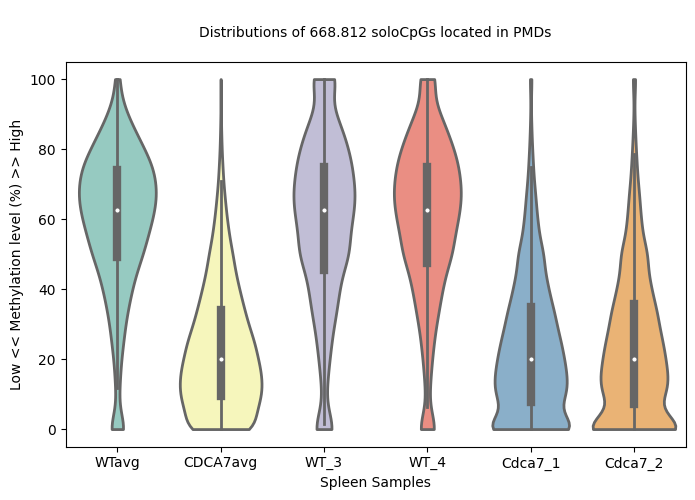

In [18]:
# Create a violinplot
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 668.812 soloCpGs located in PMDs\n", size=10, color='black')
sns.violinplot(data=df_soloPMD_avg, palette="Set3", bw=.2, cut=0, linewidth=2)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

# Save the plot as PDF
plt.savefig("soloCpGs_PMDs.pdf", dpi=300, bbox_inches="tight")

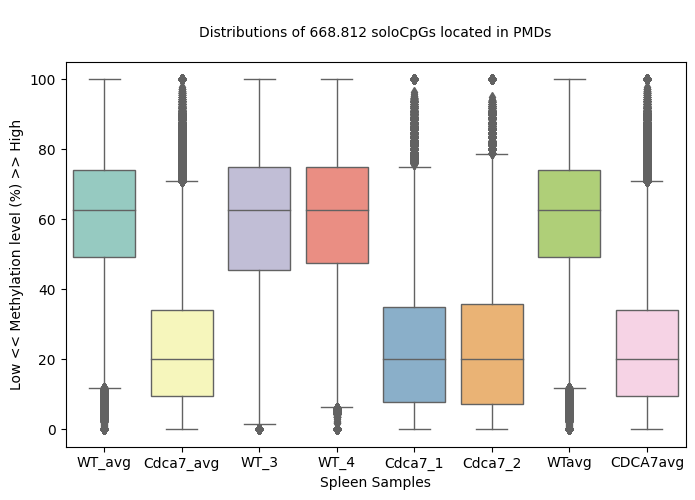

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a boxlplot
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 668.812 soloCpGs located in PMDs\n", size=10, color='black')
sns.boxplot(data=df_soloPMD_3, palette="Set3", linewidth=1, ax=ax)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)
plt.show()

# Save the plot as PDF
plt.savefig("box_soloCpGs_PMDs.pdf", dpi=300, bbox_inches="tight")

In [20]:
# calculate median values for each sample
print(df_soloPMD_3.median(axis=0))

WT_avg       62.605042
Cdca7_avg    20.000000
WT_3         62.500000
WT_4         62.500000
Cdca7_1      20.000000
Cdca7_2      20.000000
WTavg        62.605000
CDCA7avg     20.000000
dtype: float64


In [21]:
# calculate mean values for each sample
print(df_soloPMD_3.mean(axis=0))

WT_avg       59.520707
Cdca7_avg    23.282370
WT_3         59.189372
WT_4         59.852049
Cdca7_1      23.184825
Cdca7_2      23.379908
WTavg        59.520710
CDCA7avg     23.282367
dtype: float64


In [22]:
# Prepare data frame to create a plot¶
df_soloHMD_3 = df_soloHMD_2[["WT_avg", "Cdca7_avg", "WT_3","WT_4", "Cdca7_1", "Cdca7_2"]]
df_soloHMD_3

,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2
151095,100.0,0.0,100.0,100.0,0.0,0.0
490771,100.0,0.0,100.0,100.0,0.0,0.0
68781,100.0,0.0,100.0,100.0,0.0,0.0
551259,100.0,0.0,100.0,100.0,0.0,0.0
550561,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
524693,0.0,100.0,0.0,0.0,100.0,100.0
389358,0.0,100.0,0.0,0.0,100.0,100.0
481931,0.0,100.0,0.0,0.0,100.0,100.0
343695,0.0,100.0,0.0,0.0,100.0,100.0


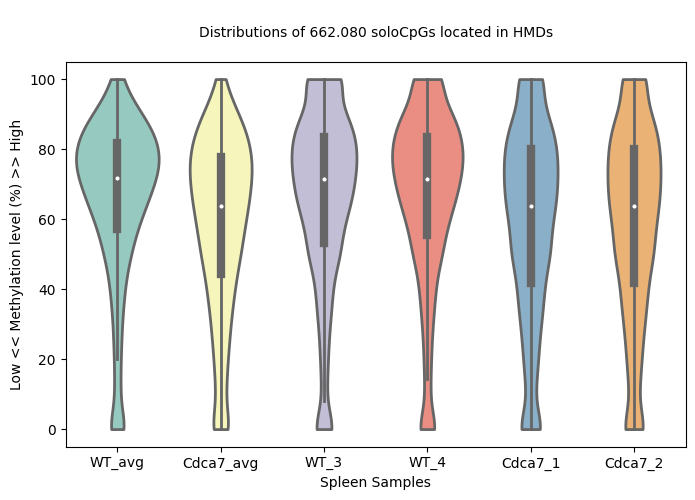

In [23]:
# Create a violinplot
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 662.080 soloCpGs located in HMDs\n", size=10, color='black')
sns.violinplot(data=df_soloHMD_3, palette="Set3", bw=.2, cut=0, linewidth=2)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

# Save the plot as PDF
plt.savefig("soloCpGs_HMDs.pdf", dpi=300, bbox_inches="tight")

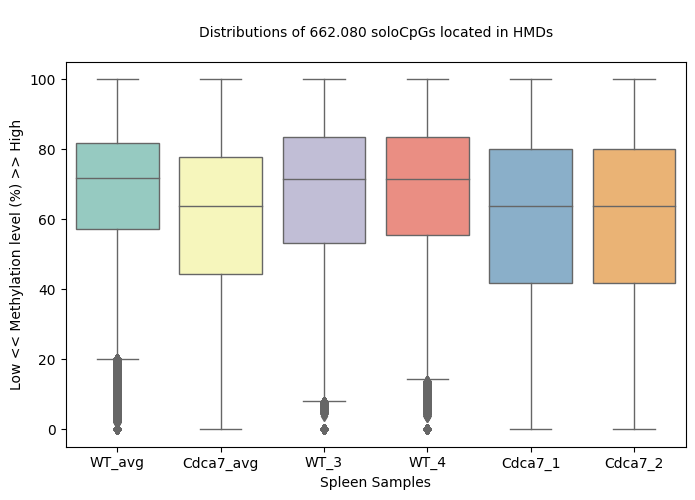

<Figure size 640x480 with 0 Axes>

In [24]:
# Create a boxlplot
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 662.080 soloCpGs located in HMDs\n", size=10, color='black')
sns.boxplot(data=df_soloHMD_3, palette="Set3", linewidth=1, ax=ax)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)
plt.show()

# Save the plot as PDF
plt.savefig("box_soloCpGs_HMDs.pdf", dpi=300, bbox_inches="tight")

In [25]:
# calculate median values for each sample
print(df_soloHMD_3.median(axis=0))

WT_avg       71.666666
Cdca7_avg    63.750000
WT_3         71.428600
WT_4         71.428600
Cdca7_1      63.636400
Cdca7_2      63.636400
dtype: float64


In [26]:
# calculate mean values for each sample
print(df_soloHMD_3.mean(axis=0))

WT_avg       66.084911
Cdca7_avg    58.903654
WT_3         65.838312
WT_4         66.331519
Cdca7_1      58.882958
Cdca7_2      58.924356
dtype: float64


In [27]:
df_soloPMD_2

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
662723,chr9,107075066,107075067,100.0,0.0,100.0,0.0,0.0,100.0,100.0
381147,chr3,114309704,114309705,100.0,0.0,100.0,0.0,0.0,100.0,100.0
184269,chr14,85878836,85878837,100.0,0.0,100.0,0.0,0.0,100.0,100.0
612511,chr8,58542194,58542195,100.0,0.0,100.0,0.0,0.0,100.0,100.0
103372,chr11,73740886,73740887,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
46374,chr1,137744170,137744171,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
390102,chr3,143279680,143279681,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
159333,chr13,17130525,17130526,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
449085,chr4,10739759,10739760,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [28]:
# select rows where the 'Delta_Cdca7' values are either greater than or equal to 20 or less than or equal to -20.
# Cdca7 affected; cutoff=20%
df_soloPMD_4 = df_soloPMD_2.loc[(df_soloPMD_2['Delta_Cdca7'] >= 20) | (df_soloPMD_2['Delta_Cdca7'] <= -20)]
df_soloPMD_4

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
662723,chr9,107075066,107075067,100.0,0.0,100.0,0.0,0.0,100.0,100.0
381147,chr3,114309704,114309705,100.0,0.0,100.0,0.0,0.0,100.0,100.0
184269,chr14,85878836,85878837,100.0,0.0,100.0,0.0,0.0,100.0,100.0
612511,chr8,58542194,58542195,100.0,0.0,100.0,0.0,0.0,100.0,100.0
103372,chr11,73740886,73740887,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
46374,chr1,137744170,137744171,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
390102,chr3,143279680,143279681,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
159333,chr13,17130525,17130526,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
449085,chr4,10739759,10739760,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [29]:
# Prepare data frame to create a plot¶
df_soloPMD_4 = df_soloPMD_4[["WT_avg", "Cdca7_avg", "WT_3","WT_4", "Cdca7_1", "Cdca7_2"]]
df_soloPMD_4

,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2
662723,100.0,0.0,100.0,100.0,0.0,0.0
381147,100.0,0.0,100.0,100.0,0.0,0.0
184269,100.0,0.0,100.0,100.0,0.0,0.0
612511,100.0,0.0,100.0,100.0,0.0,0.0
103372,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
46374,0.0,100.0,0.0,0.0,100.0,100.0
390102,0.0,100.0,0.0,0.0,100.0,100.0
159333,0.0,100.0,0.0,0.0,100.0,100.0
449085,0.0,100.0,0.0,0.0,100.0,100.0


Text(0.5, 0, 'Spleen Samples')

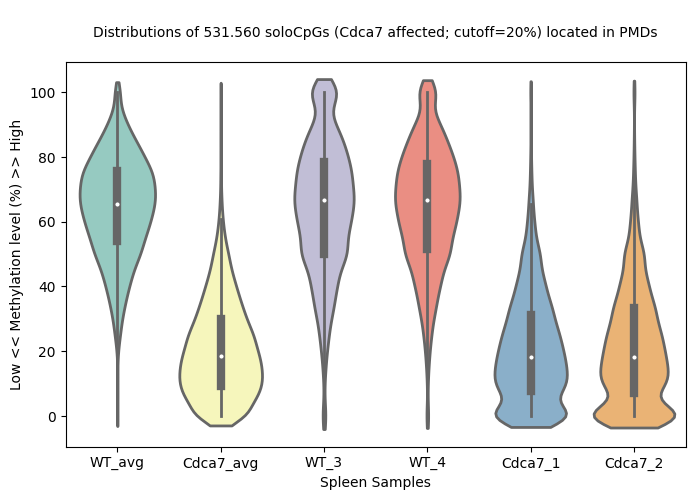

In [30]:
# Create a violinplot
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 531.560 soloCpGs (Cdca7 affected; cutoff=20%) located in PMDs\n", size=10, color='black')
sns.violinplot(data=df_soloPMD_4, palette="Set3", bw=.2, cut=1, linewidth=2)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

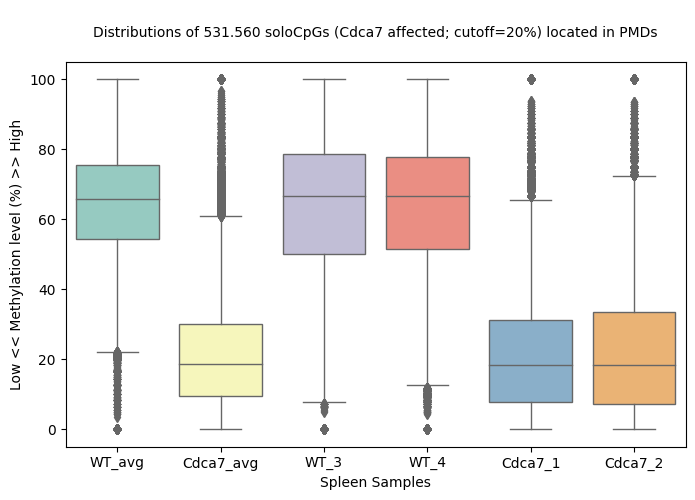

In [31]:
# Create a boxlplot
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 531.560 soloCpGs (Cdca7 affected; cutoff=20%) located in PMDs\n", size=10, color='black')
sns.boxplot(data=df_soloPMD_4, palette="Set3", linewidth=1, ax=ax)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

plt.show()

In [32]:
# calculate median values for each sample
print(df_soloPMD_4.median(axis=0))

WT_avg       65.625000
Cdca7_avg    18.465909
WT_3         66.666700
WT_4         66.666700
Cdca7_1      18.181800
Cdca7_2      18.181800
dtype: float64


In [33]:
# calculate mean values for each sample
print(df_soloPMD_4.mean(axis=0))

WT_avg       64.438027
Cdca7_avg    20.797269
WT_3         64.395393
WT_4         64.480669
Cdca7_1      20.882350
Cdca7_2      20.712180
dtype: float64


In [34]:
df_soloHMD_2

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
151095,chr12,111973005,111973006,100.0,0.0,100.0,0.0,0.0,100.0,100.0
490771,chr5,65745303,65745304,100.0,0.0,100.0,0.0,0.0,100.0,100.0
68781,chr10,108482130,108482131,100.0,0.0,100.0,0.0,0.0,100.0,100.0
551259,chr6,48549291,48549292,100.0,0.0,100.0,0.0,0.0,100.0,100.0
550561,chr6,39466137,39466138,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
524693,chr6,31441679,31441680,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
389358,chr2,92360900,92360901,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
481931,chr5,144940926,144940927,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
343695,chr19,32104584,32104585,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [35]:
# select rows where the 'Delta_Cdca7' values are either greater than or equal to 20 or less than or equal to -20.
# Cdca7 affected; cutoff=20%
df_soloHMD_4 = df_soloHMD_2.loc[(df_soloHMD_2['Delta_Cdca7'] >= 20) | (df_soloHMD_2['Delta_Cdca7'] <= -20)]
df_soloHMD_4

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
151095,chr12,111973005,111973006,100.0,0.0,100.0,0.0,0.0,100.0,100.0
490771,chr5,65745303,65745304,100.0,0.0,100.0,0.0,0.0,100.0,100.0
68781,chr10,108482130,108482131,100.0,0.0,100.0,0.0,0.0,100.0,100.0
551259,chr6,48549291,48549292,100.0,0.0,100.0,0.0,0.0,100.0,100.0
550561,chr6,39466137,39466138,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
524693,chr6,31441679,31441680,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
389358,chr2,92360900,92360901,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
481931,chr5,144940926,144940927,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
343695,chr19,32104584,32104585,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [36]:
# Prepare data frame to create a plot¶
df_soloHMD_4 = df_soloHMD_4[["WT_avg", "Cdca7_avg", "WT_3","WT_4", "Cdca7_1", "Cdca7_2"]]
df_soloHMD_4

,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2
151095,100.0,0.0,100.0,100.0,0.0,0.0
490771,100.0,0.0,100.0,100.0,0.0,0.0
68781,100.0,0.0,100.0,100.0,0.0,0.0
551259,100.0,0.0,100.0,100.0,0.0,0.0
550561,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
524693,0.0,100.0,0.0,0.0,100.0,100.0
389358,0.0,100.0,0.0,0.0,100.0,100.0
481931,0.0,100.0,0.0,0.0,100.0,100.0
343695,0.0,100.0,0.0,0.0,100.0,100.0


Text(0.5, 0, 'Spleen Samples')

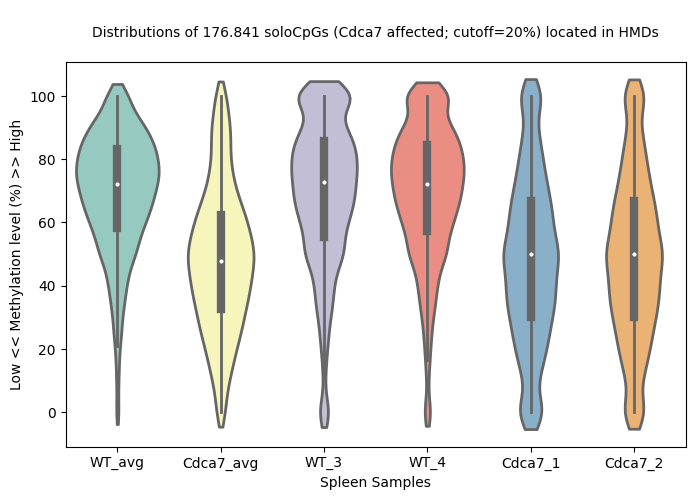

In [37]:
# Create a violinplot
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 176.841 soloCpGs (Cdca7 affected; cutoff=20%) located in HMDs\n", size=10, color='black')
sns.violinplot(data=df_soloHMD_4, palette="Set3", bw=.2, cut=1, linewidth=2)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

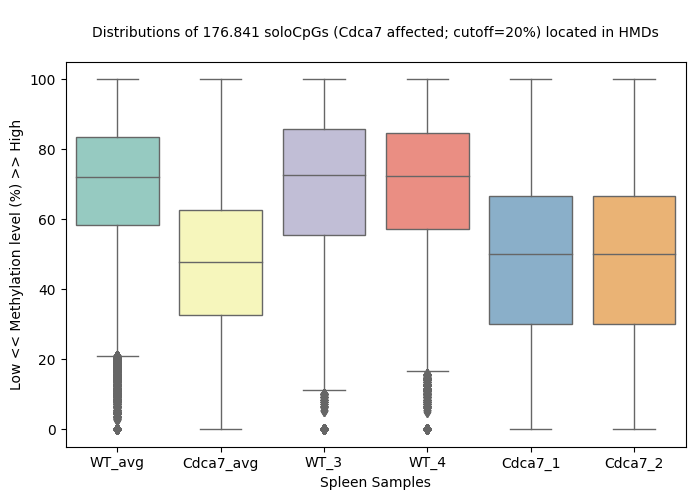

In [38]:
# Create a boxlplot
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 176.841 soloCpGs (Cdca7 affected; cutoff=20%) located in HMDs\n", size=10, color='black')
sns.boxplot(data=df_soloHMD_4, palette="Set3", linewidth=1, ax=ax)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

plt.show()

In [39]:
# calculate median values for each sample
print(df_soloHMD_4.median(axis=0))

WT_avg       72.077922
Cdca7_avg    47.860963
WT_3         72.727300
WT_4         72.222200
Cdca7_1      50.000000
Cdca7_2      50.000000
dtype: float64


In [40]:
# calculate mean values for each sample
print(df_soloHMD_4.mean(axis=0))

WT_avg       69.331103
Cdca7_avg    48.509552
WT_3         69.289246
WT_4         69.372968
Cdca7_1      48.318640
Cdca7_2      48.700463
dtype: float64


In [41]:
df_spleen

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
0,0,chr1,72276064,72276065,79.220779,62.987013,16.233766,72.7273,85.7143,71.42860,54.5455
1,1,chr1,72275887,72275888,71.363636,78.671329,-7.307693,70.0000,72.7273,72.72730,84.6154
2,2,chr1,72276118,72276119,93.750000,81.250000,12.500000,87.5000,100.0000,87.50000,75.0000
3,3,chr1,72276126,72276127,100.000000,81.250000,18.750000,100.0000,100.0000,87.50000,75.0000
4,4,chr1,72276156,72276157,77.777778,68.571428,9.206350,100.0000,55.5556,57.14290,80.0000
...,...,...,...,...,...,...,...,...,...,...,...
19185092,19185092,chrY,9639924,9639925,70.294117,18.831169,51.462948,70.5882,70.0000,9.09091,28.5714
19185093,19185093,chrY,9640047,9640048,62.152778,5.000000,57.152778,55.5556,68.7500,10.00000,0.0000
19185094,19185094,chrY,9640439,9640440,75.000000,16.666667,58.333333,50.0000,100.0000,0.00000,33.3333
19185095,19185095,chrY,9638955,9638956,8.333334,32.500000,-24.166666,0.0000,16.6667,25.00000,40.0000


In [42]:
# filter rows where chr column has chr2

df_spleen_filtered_1 = df_spleen[(df_spleen["chr"] == "chr18")]
df_spleen_filtered_1

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
8225787,8225787,chr18,64872639,64872640,66.818182,43.650793,23.167389,70.0000,63.6364,42.8571,44.4444
8225788,8225788,chr18,64874241,64874242,76.190477,70.329670,5.860807,85.7143,66.6667,71.4286,69.2308
8225789,8225789,chr18,64872658,64872659,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
8225790,8225790,chr18,64872773,64872774,58.333334,65.714286,-7.380952,66.6667,50.0000,60.0000,71.4286
8225791,8225791,chr18,64872811,64872812,57.142857,22.222222,34.920635,57.1429,57.1429,44.4444,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
8893789,8893789,chr18,36478161,36478162,100.000000,48.106061,51.893939,100.0000,100.0000,41.6667,54.5455
8893790,8893790,chr18,36478881,36478882,70.833334,75.000000,-4.166666,75.0000,66.6667,100.0000,50.0000
8893791,8893791,chr18,36478911,36478912,79.797980,60.714286,19.083694,81.8182,77.7778,50.0000,71.4286
8893792,8893792,chr18,36478919,36478920,90.833334,92.857143,-2.023809,91.6667,90.0000,100.0000,85.7143


In [43]:
# filter more for spesific region chr18: 36927184-37190657 Pcdh_a cluster
df_spleen_filtered_2 = df_spleen_filtered_1[(df_spleen_filtered_1["start"] >= 36927184) & (df_spleen_filtered_1["end"] <= 37190657)]
df_spleen_filtered_2

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
8858789,8858789,chr18,37188905,37188906,49.350649,0.000000,49.350649,71.4286,27.2727,0.0000,0.0000
8858790,8858790,chr18,37188961,37188962,57.777778,42.500000,15.277778,55.5556,60.0000,60.0000,25.0000
8858791,8858791,chr18,37188965,37188966,81.111111,55.000000,26.111111,88.8889,73.3333,60.0000,50.0000
8858792,8858792,chr18,37189118,37189119,46.875000,30.303030,16.571970,50.0000,43.7500,27.2727,33.3333
8858793,8858793,chr18,37189181,37189182,97.222222,80.113636,17.108586,100.0000,94.4444,72.7273,87.5000
...,...,...,...,...,...,...,...,...,...,...,...
8888640,8888640,chr18,36974211,36974212,54.166667,18.750000,35.416667,75.0000,33.3333,0.0000,37.5000
8888641,8888641,chr18,36974215,36974216,37.500000,0.000000,37.500000,25.0000,50.0000,0.0000,0.0000
8888642,8888642,chr18,36974220,36974221,28.750000,5.000000,23.750000,37.5000,20.0000,0.0000,10.0000
8888643,8888643,chr18,36974250,36974251,24.090909,22.500000,1.590909,30.0000,18.1818,25.0000,20.0000


In [44]:
# filter more for spesific region chr18: 37261938-37527479 Pcdh_b cluster
df_spleen_filtered_3 = df_spleen_filtered_1[(df_spleen_filtered_1["start"] >= 37261938) & (df_spleen_filtered_1["end"] <= 37527479)]
df_spleen_filtered_3

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
8857430,8857430,chr18,37364333,37364334,76.388889,83.333334,-6.944445,77.7778,75.0000,66.6667,100.00000
8857431,8857431,chr18,37364355,37364356,94.444445,100.000000,-5.555555,88.8889,100.0000,100.0000,100.00000
8857432,8857432,chr18,37364394,37364395,100.000000,50.000000,50.000000,100.0000,100.0000,100.0000,0.00000
8857433,8857433,chr18,37364429,37364430,95.454545,41.666666,53.787879,90.9091,100.0000,83.3333,0.00000
8857434,8857434,chr18,37364441,37364442,82.575757,41.666666,40.909091,81.8182,83.3333,83.3333,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
8862447,8862447,chr18,37524021,37524022,67.222222,7.500000,59.722222,73.3333,61.1111,15.0000,0.00000
8862448,8862448,chr18,37524271,37524272,53.571428,10.000000,43.571428,50.0000,57.1429,20.0000,0.00000
8862449,8862449,chr18,37524282,37524283,57.936508,3.846154,54.090354,44.4444,71.4286,0.0000,7.69231
8862450,8862450,chr18,37526235,37526236,56.313131,19.886364,36.426767,44.4444,68.1818,27.2727,12.50000


In [45]:
# filter more for spesific region chr18: 37658793-37838873  Pcdh_g cluster
df_spleen_filtered_4 = df_spleen_filtered_1[(df_spleen_filtered_1["start"] >= 37658793) & (df_spleen_filtered_1["end"] <= 37838873)]
df_spleen_filtered_4

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
8852189,8852189,chr18,37806818,37806819,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
8852190,8852190,chr18,37806827,37806828,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
8852191,8852191,chr18,37806841,37806842,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
8852192,8852192,chr18,37806846,37806847,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
8852193,8852193,chr18,37806891,37806892,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
8861339,8861339,chr18,37690881,37690882,76.923077,71.363636,5.559441,92.3077,61.5385,70.0000,72.7273
8861340,8861340,chr18,37690926,37690927,89.285714,70.909091,18.376623,78.5714,100.0000,60.0000,81.8182
8861341,8861341,chr18,37690988,37690989,76.363636,52.777778,23.585858,72.7273,80.0000,55.5556,50.0000
8861342,8861342,chr18,37691003,37691004,46.060606,41.269841,4.790765,45.4545,46.6667,71.4286,11.1111
